In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df=sns.load_dataset("taxis") #Loading the Taxis Dataset

In [13]:
print(df.isnull().sum()) 

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [14]:
df #Impute missing values using mean median can't be performed as the numerical values are not missing

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [15]:
df.dropna(inplace=True)

In [16]:
print(df.isnull().sum()) # Cleaned

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


In [17]:
df['pickup'] = pd.to_datetime(df['pickup']) #Line Chart

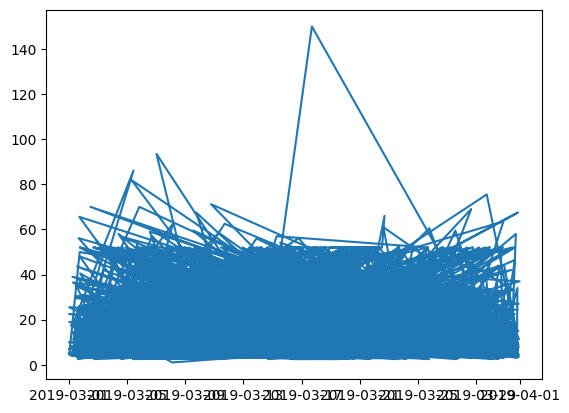

In [33]:
plt.plot(df['pickup'],df['fare']);

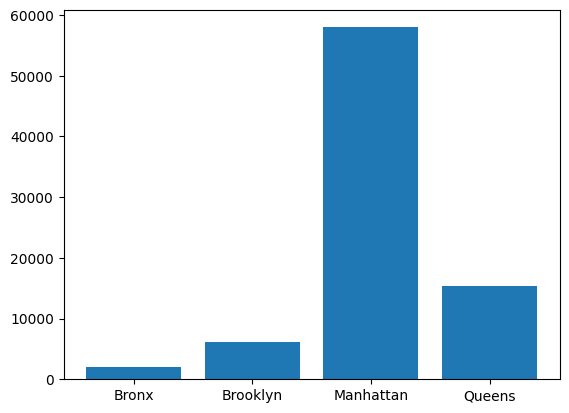

In [69]:
fare_by_borough = df.groupby('pickup_borough')['fare'].sum() #bar chart
plt.bar(fare_by_borough.index,fare_by_borough);


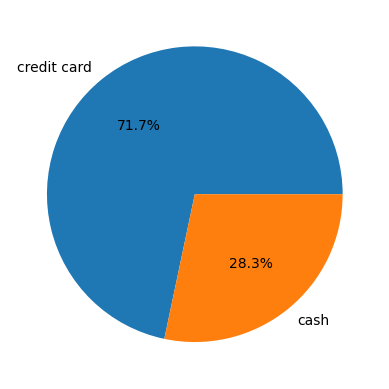

In [71]:
plt.pie(df['payment'].value_counts(),labels=df['payment'].value_counts().index,autopct='%1.1f%%'); #Pie Chart

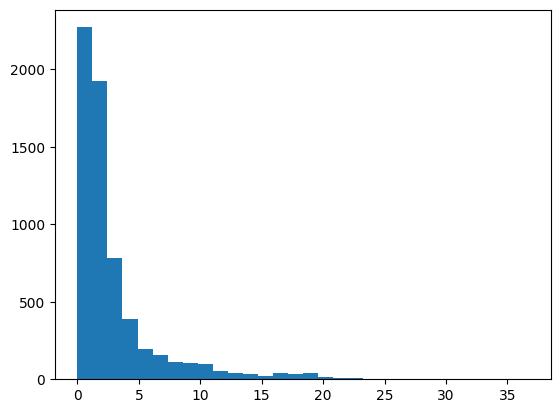

In [77]:
plt.hist(df['distance'],bins=30); #Histogram

C:\Users\midhu\AppData\Local\Temp\ipykernel_13292\1549931414.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grouped_tips,labels=boroughs);


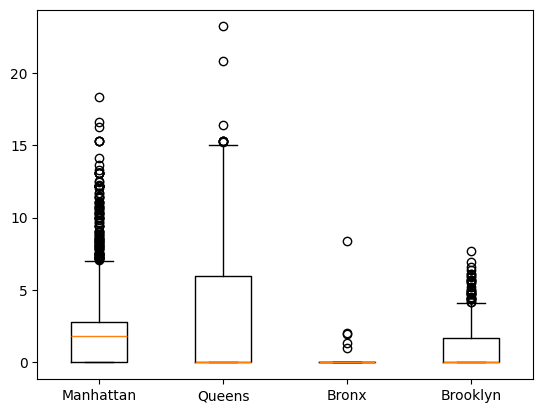

In [88]:
boroughs= df['pickup_borough'].unique()  #Box Plot
grouped_tips= [df[df['pickup_borough'] == borough]['tip'] for borough in boroughs]
plt.boxplot(grouped_tips,labels=boroughs);

In [93]:
#Visualizations using Seaborn

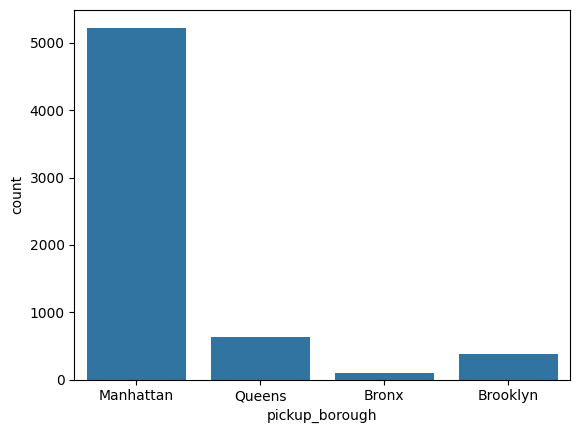

In [96]:
sns.countplot(data=df,x='pickup_borough'); #Count Plot

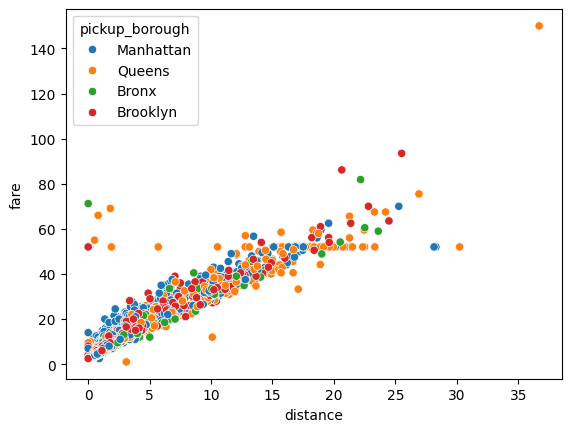

In [99]:
 sns.scatterplot(data=df,x='distance',y='fare',hue='pickup_borough'); #Scatter plot

In [102]:
new=df[['distance', 'fare', 'tip', 'tolls', 'total']] #Heatmap
rel=new.corr()

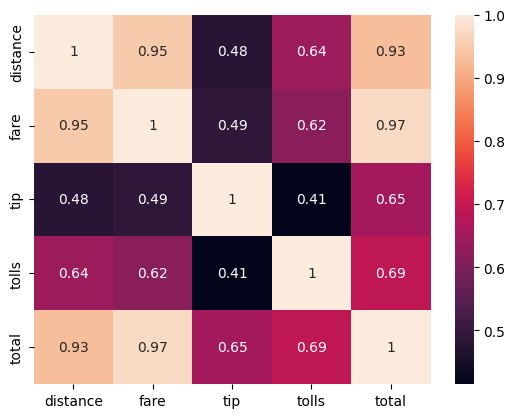

In [103]:
sns.heatmap(data=rel,annot=True);

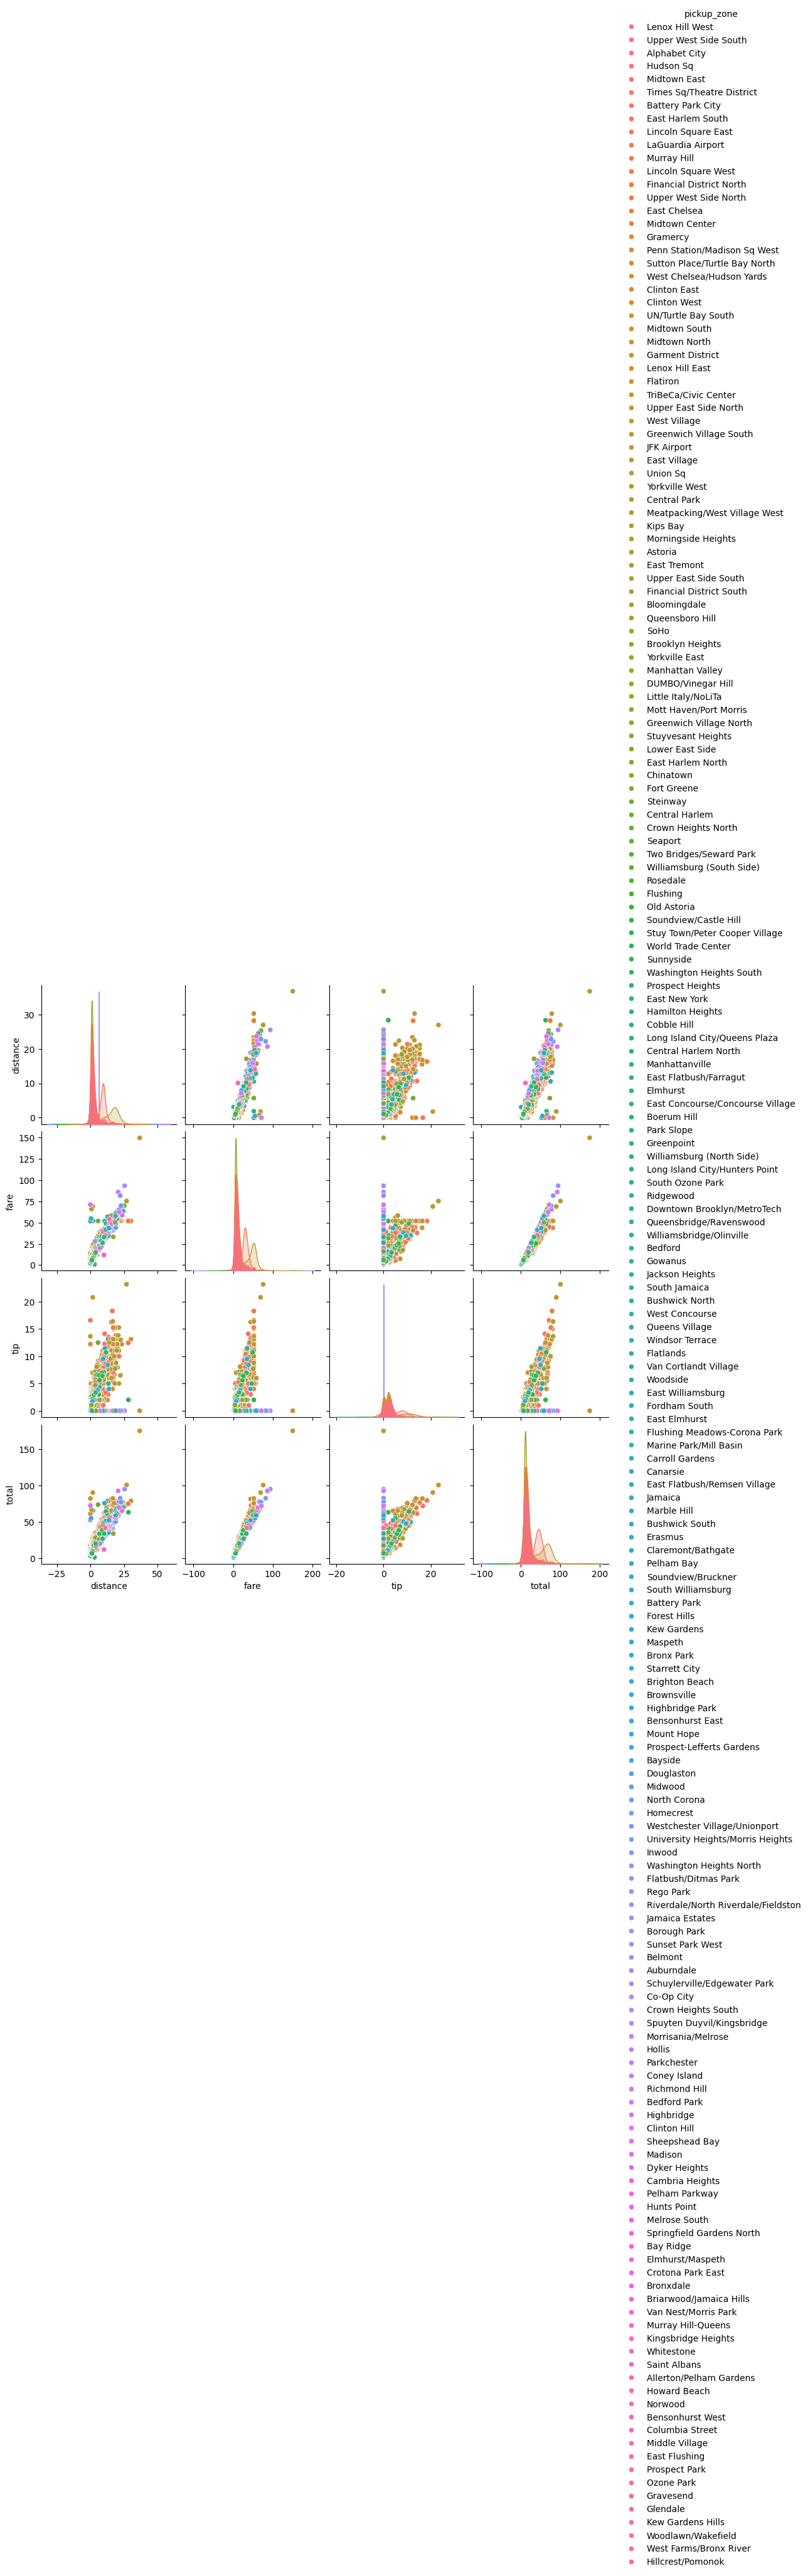

In [109]:
sns.pairplot(df[['distance', 'fare', 'tip', 'total', 'pickup_zone']],hue='pickup_zone'); #Pair Plot

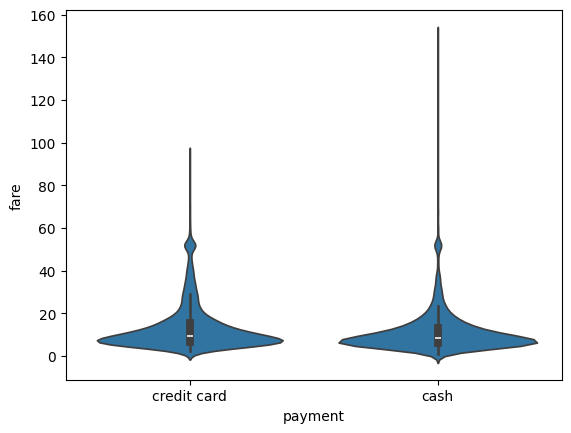

In [110]:
sns.violinplot(data=df, x='payment', y='fare'); #Violin Plot